In [1]:
env(mpl=True, tfl=True)
from collections import defaultdict

In [3]:
rs = unpickle('../data/recipes_test.pkl')
sri = unpickle('../../ingr_lda/data/simply_recipes_ingrs_test.pkl')
rrembs = np.load('rrembs.npy')

In [8]:
rid2ingrs = {}
for r in sri:
    ringrs = set()
    for ingr in r['pred_ingrs']:
        if ingr[0][1] + ingr[1][1] < 0.6:
            continue
        ringrs.add(ingr[0][0])
    rid2ingrs[r['id']] = ringrs
    
rid2verbs = {}
for r in sri:
    rverbs = set(instr[0] for instr in r['instructions'])
    rid2verbs[r['id']] = rverbs

In [26]:
# rembs = np.load('../data/embs/ensemble_allres18/instr_embs_avg.npy')
# idx2r = [r for r in rs for _ in r.get('images', [])]
# r2idx = defaultdict(lambda: [])
# for i,r in enumerate(idx2r):
#     r2idx[r['id']].append(i)
# real_rembs = np.empty((len(rs), 64), dtype='float32')
# for i, r in enumerate(rs):
#     real_rembs[i] = rembs[r2idx[r['id']][0]]
# rrembs = real_rembs
rrembs = np.load('rrembs.npy')

In [87]:
def vt_ingr(i1, i2, k=5):
    i1_idxs = [i for i,r in enumerate(rs) if i1 in rid2ingrs[r['id']]]
    i2_idxs = [i for i,r in enumerate(rs) if i2 in rid2ingrs[r['id']]]
    assert i1_idxs and i2_idxs
    i1_embs = rrembs[i1_idxs].mean(0)
    i2_embs = rrembs[i2_idxs].mean(0)
    comb_embs = (i1_embs + i2_embs)/2
    for ki in np.linalg.norm(rrembs - comb_embs, axis=1).argsort()[:k]:
        print(rs[ki]['title'])

In [411]:
def plot_tsne(data, c=None, alph=0.25, cm=snscm,sz=30):
    plt.margins(0)
    plt.axis('off')
    xs = data[:, 0]
    ys = data[:, 1]
    cs = data[:, 2] if data.shape[1] == 3 else c
    fig = plt.scatter(xs, ys, c=cs,
                cmap=cm, # set color map of markers
                alpha=alph, # set alpha of markers
                marker='.', # use smallest available marker (square)
                s=sz,
                lw=0, # don't use edges
                edgecolor='') # don't use edges
    # remove all axes and whitespace / borders
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

# TSNE

In [91]:
import re
azn_re = re.compile(r'(sushi|curry$|stir|asian)')

In [93]:
rrembs_2 = np.load('tsne_rrembs_2_5ss.npy')
rrembs_2_sph = np.load('tsne_rrembs_2_5ss_sph.npy')
rrembs_3 = np.load('tsne_rrembs_3_5ss.npy')

In [405]:
rtitles = [r['title'].lower() for r in rs]
rtss = rtitles[::5][::2]

In [612]:
import matplotlib as mpl
snscp = list(sns.color_palette())
snscm = mpl.colors.ListedColormap(colors=snscp, name='sns')
selcps = [snscp[1], snscp[2], snscp[4]]
snscm0 = mpl.colors.ListedColormap(colors=selcps, name='sns0')

In [770]:
cookies = np.array(['cookies' in rt for rt in rtss])
cupcakes = np.array(['asparagus' in rt for rt in rtss])
bread = np.array([re.search('bread$', rt) is not None for rt in rtss])
chop = np.array([re.search('chops', rt) is not None for rt in rtss])
pie = np.array([re.search('((apple|pecan|strawberry|rhubarb|berry|pumpkin|squash) pie$|cobbler)', rt) is not None for rt in rtss])
# cupcakes = np.array(['cake' in rt for rt in rtss])
sandwiches = np.array(['sandwich' in rt for rt in rtss])
chili = np.array(['chili' in rt for rt in rtss])
bean = np.array(['bean' in rt for rt in rtss])
test = np.array([re.search('curr(y|ies|ied)', rt) is not None for rt in rtss])

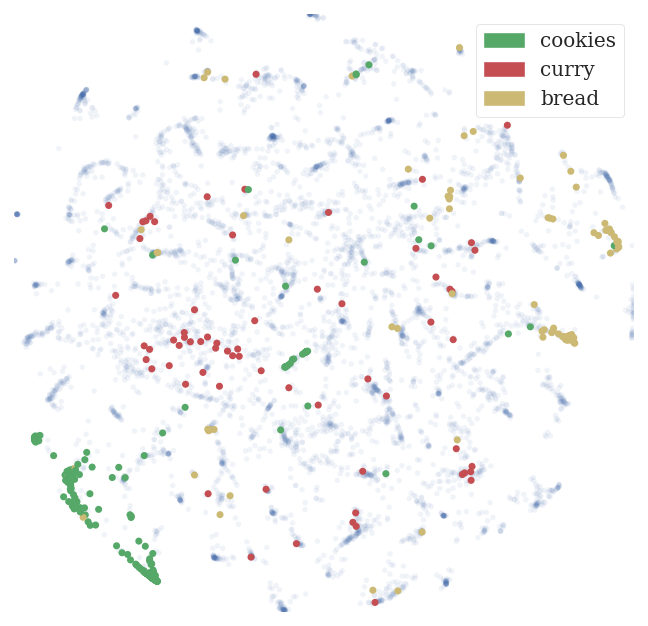

In [788]:
plt.gca().set_aspect('equal')
cs = np.zeros(len(rrembs_2_sph[::2]))
cs[cookies] = 1
cs[test] = 2
cs[bread] = 3

plot_tsne(rrembs_2_sph[::2][cs == 0], alph=.08, sz=30)
plot_tsne(rrembs_2_sph[::2][cs > 0], c=cs[cs > 0] - 1, alph=1, cm=snscm0, sz=50)

p1 = mpatches.Patch(color=selcps[0], label='cookies')
p2 = mpatches.Patch(color=selcps[1], label='curry')
p3 = mpatches.Patch(color=selcps[2], label='bread')
plt.legend(handles=[p1,p2,p3], loc='upper right')
plt.savefig('tsne.pdf', bbox_inches='tight')

In [775]:
snscm[0]

TypeError: 'ListedColormap' object does not support indexing

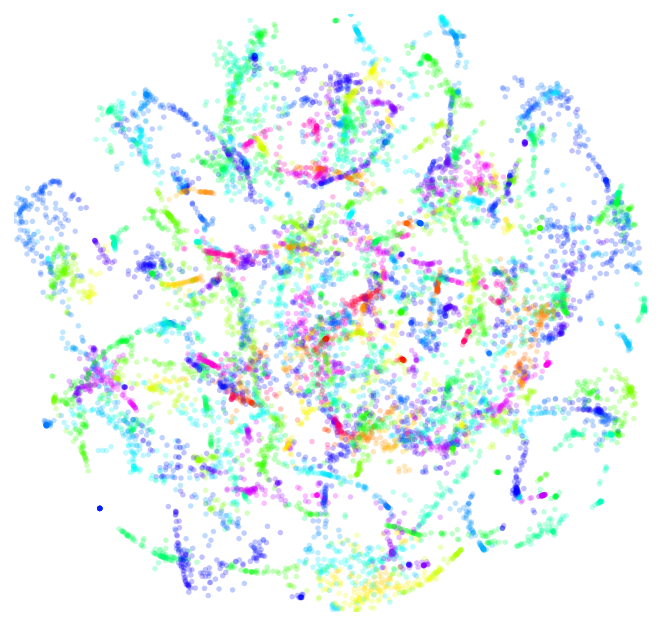

In [81]:
plt.gca().set_aspect('equal')
plot_tsne(rrembs_3)

# PCA

In [42]:
usv = np.load('rrembs_svd.npz')
v = usv['v']
usv.close()

In [43]:
Z = (rrembs - rrembs.mean(0)) @ v.T
Z2 = Z[:, :2]

In [59]:
pcs = np.array([[-.5, 1.65172], [1.12, -1.30434]])
dv = (pcs[0] - pcs[1])
nv = np.array([dv[1], -dv[0]])
nv /= np.linalg.norm(nv)

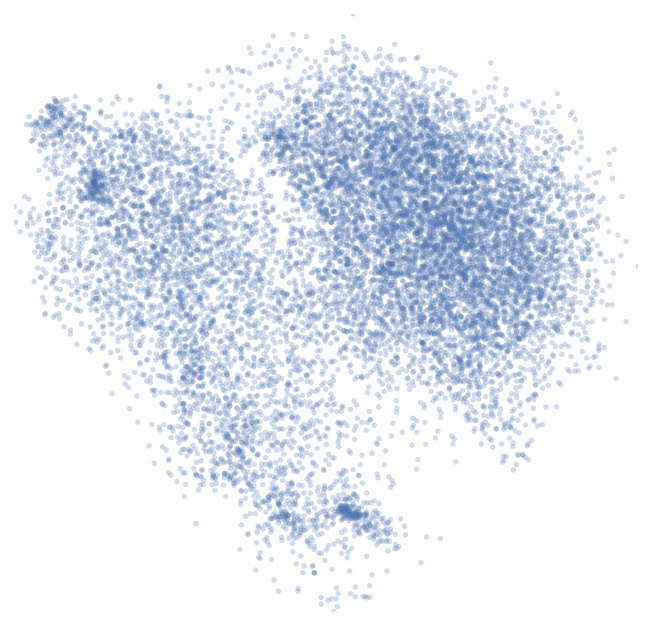

In [75]:
plt.gca().set_aspect('equal')
mp = pcs.mean(0)
# plt.arrow(mp[0], mp[1], nv[0], nv[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
# plt.arrow(pcs[1, 0], pcs[1, 1], v[0], v[1], head_width=0, head_length=0, fc='k', ec='k')
# plt.scatter(pcs[:, 0], pcs[:, 1])
plot_tsne(Z2[::5])
plt.savefig('pca01.pdf', bbox_inches='tight')

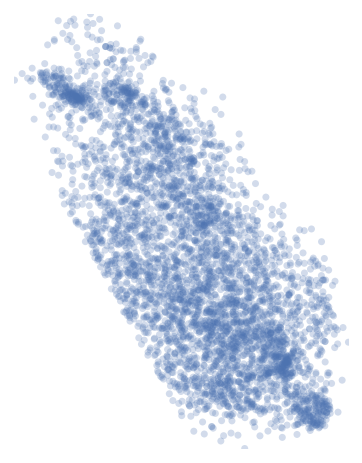

In [593]:
plt.gca().set_aspect('equal')
cls = Z2.dot(nv) > 0.3
plot_tsne(Z2[cls][::5])

In [590]:
th = np.arctan(nv[1]/nv[0])
R = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])

In [598]:
Z2c = Z2[cls]

In [599]:
u2,s2,v2 = np.linalg.svd(Z2c - Z2c.mean(0))

In [643]:
Z2t = (Z2c - Z2c.mean(0)) @ v2.T
for idx in Z2t[abs(Z2t[:,1] - 0.01) < 0.1,0].argsort()[::100]:
    print(rs[idx]['title'])

Venison chilli
Lemon Ginger Almond Upside-Down Cake
Peanut Butter Crispy Rice Treats
Mediterranean Sausage Chili #Ragu
nothing green salad
Italian Chicken Soup
Mango Mousse.. (Egg less)
Spicy hot chocolate
Gherkin Dip
Dick's Dip
Spinach Mash With Garlic and Fetta
Oatmeal macaroons
Turkish style mushroom pizza recipe
California Avocado Guacamole
Red Quinoa, Almond and Arugula Salad (By Marco Borges)
Five Spice Powder
Cinnamon Apple Cookies
Holiday Shortbread Logs
Harvest Loaf (Bread Machine)
Papa Chow
Nicole's Garbanzo-Citrus Spread
Rich and Charlie's Salad
Super Creamy Spicy Sausage Mac n Cheese
Pineapple Rum Tart
Strawberry Yogurt Parfait
Scratch Pumpkin Pie
Mediterranean Jewel Cocktail
Fennel, brie and cardamom tarts recipe
Chickpea Curry
Irish Bacon and Cabbage with Mustard Sauce
Cream of Crab Soup
Crab Cakes Recipe
Lemon Marinated Chicken
Easy Not-Spicy Mapo Tofu
Beet Salads
Chicken Cordon Bleu Roll-Ups
Quinoa Breakfast Bowl with Egg, Tomatoes and Avocado


In [419]:
from sklearn.mixture import GaussianMixture
m = GaussianMixture(n_components=2)
m.fit(Z2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [458]:
for idx in np.linalg.norm(Z2 - m.means_[0], axis=1).argsort()[:10]:
    print(rs[idx]['title'])

Easy Autumn Pear Cake
Easy and Pretty Lollypop Cookies
Healthy Tofu Tiramisu
Sugar Free Christmas Cutouts
50 Second Fudge
Mexican Fudge
White Chocolate Eggnog Fudge
AMIEs Pastillas (my XMAs caramel-coated egg candies)
Butterfinger Nutter Butter Cheesecake Bars
Ginger-Molasses Scones


In [459]:
for idx in np.linalg.norm(Z2 - m.means_[1], axis=1).argsort()[:10]:
    print(rs[idx]['title'])

Grilled Chicken with Habanero and Orange Glaze
Boston Baked Beans
Goat's Cheese and Cherry Tomato Puff
Slow Cooker Mac & Cheese
Tunisian Lamb with Saffron (Keleya Zaara)
Beer-Braised Pulled Pork Recipe
Smoky Barbeque Chicken
Rosemary Cashews
BBQ Mango & Avocado Skewers
Roasted Carrot Stick Snack


In [513]:
avg = m.means_.mean(0)
for idx in np.linalg.norm(Z2 - avg, axis=1).argsort()[:20]:
    print(rs[idx]['title'])

Brie & Spiced Pear Paste Sandwich
Chef's Salt
Easy Homemade Tsubu-an
Bar Stool Pretzels
Habanero Pineapple BBQ sauce (Goes great with Chicken and Pork)
Salsa for Canning
Bamboo Rice
Chili Cheese Popcorn
Easy Soft-Boiled Eggs
Slimming World Friendly Hummus
Dopplebock "Chocobock"
Petite Microwaved Cheese Omelette For Your Bento
Low Fat Red Pepper Hummus
Seafood Quiche
Christopher's Oatmeal
Cheesy Egg-in-a-Bowl
Roasted Garlic-Parmesan Bread
Hawaiian Fruit Crumble
BBQd Teriyaki Chicken with Grilled Honey-Lime Pineapple
Chipotle Honey Roasted Peanuts


In [19]:
with open('rtitles.txt', 'w') as f_rt:
    for r in rs:
        print(r['title'], file=f_rt)